Figure showing each value of timescale in the three stages for each of the MNI regions, ordered by wake and separated by lobe. 

In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mnitimescales import utils
from mnitimescales import plots

plots._set_font_params()

Imports and definitions:

In [22]:
stages = ["W", "N3", "R"]
stage_colors = {"W": "red", "N2": "cyan", "N3": "purple", "R": "green"}
title_dict = {"W": "Wake", "N2": "NREM2", "N3": "NREM3", "R": "REM"}
lobes_order = ["Occipital", "Frontal", "Parietal", "Insula", "Temporal"]

# Paths
data_path = Path("F:\\MNIOpen")
bb_path = data_path.joinpath("Results", "timescales_broadband")
gamma_path = data_path.joinpath("Results", "timescales_gamma")
fig_path = data_path.joinpath("Figures", "Fig_timescales")
fig_path.mkdir(exist_ok=True, parents=True)
df_timescales_bb = pd.concat(
    [
        pd.read_csv(bb_path.joinpath(f"tau_{stage}_mni.csv"), index_col=0)
        for stage in stages
    ],
    ignore_index=True,
)
df_timescales_gamma = pd.concat(
    [
        pd.read_csv(gamma_path.joinpath(f"tau_{stage}_mni.csv"), index_col=0)
        for stage in stages
    ],
    ignore_index=True,
)

Plot parameters:

In [23]:
# Order for plotting lobes
lobes_order = ["Occipital", "Frontal", "Parietal", "Insula", "Temporal"][::-1]

# Names to show on plot
regions_plot = {
    "Medial segment of precentral gyrus": "Precentral gyrus, medial",
    "Postcentral gyrus (including medial segment)": "Postcentral gyrus",
    "Lingual gyrus and occipital fusiform gyrus": "Lingual gyrus",
    "Opercular part of inferior frontal gyrus": "Inferior frontal gyrus, opercular",
    "Superior frontal gyrus and frontal pole": "Superior frontal gyrus",
    "Medial segment of superior frontal gyrus": "Superior frontal gyrus, medial",
    "Triangular part of inferior frontal gyrus": "Inferior frontal gyrus, triangular",
    "Orbital part of inferior frontal gyrus": "Inferior frontal gyrus, orbital",
    "Inferior ocipital gyrus and occipital pole": "Inferior ocipital gyrus",
}
regions_plot = dict(
    regions_plot,
    **{
        reg: reg
        for reg in df_timescales_bb["region"].unique()
        if reg not in regions_plot.keys()
    }
)

Broadband:

In [24]:
df_timescales_bb["lobe"] = pd.Categorical(df_timescales_bb["lobe"], lobes_order)
df_timescales_bb.sort_values("lobe", inplace=True)
df_timescales_bb

,pat,age,gender,chan,type,stage,region,mni_x,mni_y,mni_z,tau,lobe
4251,108,19,F,NG108LG530,G,R,Middle temporal gyrus,63.683333,-49.816667,-8.0,75.636705,Temporal
2914,24,26,F,GD024Lu_4,D,N3,Superior temporal gyrus,-52.000000,-29.000000,4.0,73.175848,Temporal
2915,24,26,F,GD024Lu_5,D,N3,Superior temporal gyrus,-57.000000,-29.000000,5.0,79.417181,Temporal
2916,24,26,F,GD024Lu_6,D,N3,Superior temporal gyrus,-60.000000,-30.000000,5.0,53.620389,Temporal
2917,24,26,F,GD024Lu_7,D,N3,Superior temporal gyrus,-65.000000,-30.000000,4.0,70.145682,Temporal
...,...,...,...,...,...,...,...,...,...,...,...,...
1827,85,25,F,MM085LPCu5,M,N3,Superior and middle occipital gyri,-28.000000,-91.000000,18.0,89.457239,Occipital
1828,87,32,F,MM087LOi1,M,N3,Calcarine cortex,-12.000000,-93.000000,-8.0,204.521705,Occipital
1829,87,32,F,MM087LOi2,M,N3,Inferior ocipital gyrus and occipital pole,-18.000000,-95.000000,-7.0,165.824621,Occipital
1822,83,53,M,MM083ROi2,M,N3,Calcarine cortex,16.000000,-74.000000,7.0,73.396173,Occipital


Order timescales within lobe

In [25]:
# Regions ordered by median timescale per lobe
reg_order = (
    df_timescales_bb[df_timescales_bb["stage"] == "W"][["lobe", "region", "tau"]]
    .groupby(["lobe", "region"])
    .median()
    .sort_values("tau", ascending=False)
    .dropna()
)
reg_order = reg_order.reset_index((1, 0))
reg_order["lobe"] = pd.Categorical(reg_order["lobe"], lobes_order)
reg_order.sort_values(["lobe", "tau"], ascending=False, inplace=True)
reg_order = [regions_plot[reg] for reg in reg_order["region"]]

# Count of regions within lobe
df_regions = df_timescales_bb.groupby("lobe")["region"].unique()
df_regions_len = df_regions.apply(lambda x: len(x)).cumsum()
# df_regions_len = (df_regions_len - df_regions_len.iloc[-1]).abs()
df_regions_len = df_regions_len.diff().fillna(df_regions_len.iloc[0]) - 1

C:\Users\ricca\AppData\Local\Temp\ipykernel_25500\320068635.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["lobe", "region"])
C:\Users\ricca\AppData\Local\Temp\ipykernel_25500\320068635.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_regions = df_timescales_bb.groupby("lobe")["region"].unique()


In [26]:
# Prepare dataframe for plotting
df_plot_bb = df_timescales_bb[["region", "stage", "tau"]].copy()
df_plot_bb = df_plot_bb.rename(
    columns={"stage": "cond", "tau": "Broadband Timescale [ms]"}
)
df_plot_bb = df_plot_bb.replace({"region": regions_plot, "cond": title_dict})
df_plot_bb

,region,cond,Broadband Timescale [ms]
4251,Middle temporal gyrus,REM,75.636705
2914,Superior temporal gyrus,NREM3,73.175848
2915,Superior temporal gyrus,NREM3,79.417181
2916,Superior temporal gyrus,NREM3,53.620389
2917,Superior temporal gyrus,NREM3,70.145682
...,...,...,...
1827,Superior and middle occipital gyri,NREM3,89.457239
1828,Calcarine cortex,NREM3,204.521705
1829,Inferior ocipital gyrus,NREM3,165.824621
1822,Calcarine cortex,NREM3,73.396173


Gamma:

In [27]:
df_timescales_gamma["lobe"] = pd.Categorical(df_timescales_gamma["lobe"], lobes_order)
df_timescales_gamma.sort_values("lobe", inplace=True)

# Prepare dataframe for plotting
df_plot_gamma = df_timescales_gamma[["region", "stage", "tau"]].copy()
df_plot_gamma = df_plot_gamma.rename(
    columns={"stage": "cond", "tau": "Gamma Timescale [ms]"}
)
df_plot_gamma = df_plot_gamma.replace({"region": regions_plot, "cond": title_dict})
df_plot_gamma

,region,cond,Gamma Timescale [ms]
4251,Middle temporal gyrus,REM,23.628602
2914,Superior temporal gyrus,NREM3,138.990518
2915,Superior temporal gyrus,NREM3,51.436291
2916,Superior temporal gyrus,NREM3,33.101859
2917,Superior temporal gyrus,NREM3,29.680426
...,...,...,...
1827,Superior and middle occipital gyri,NREM3,63.223728
1828,Calcarine cortex,NREM3,54.417736
1829,Inferior ocipital gyrus,NREM3,140.514115
1822,Calcarine cortex,NREM3,43.282095


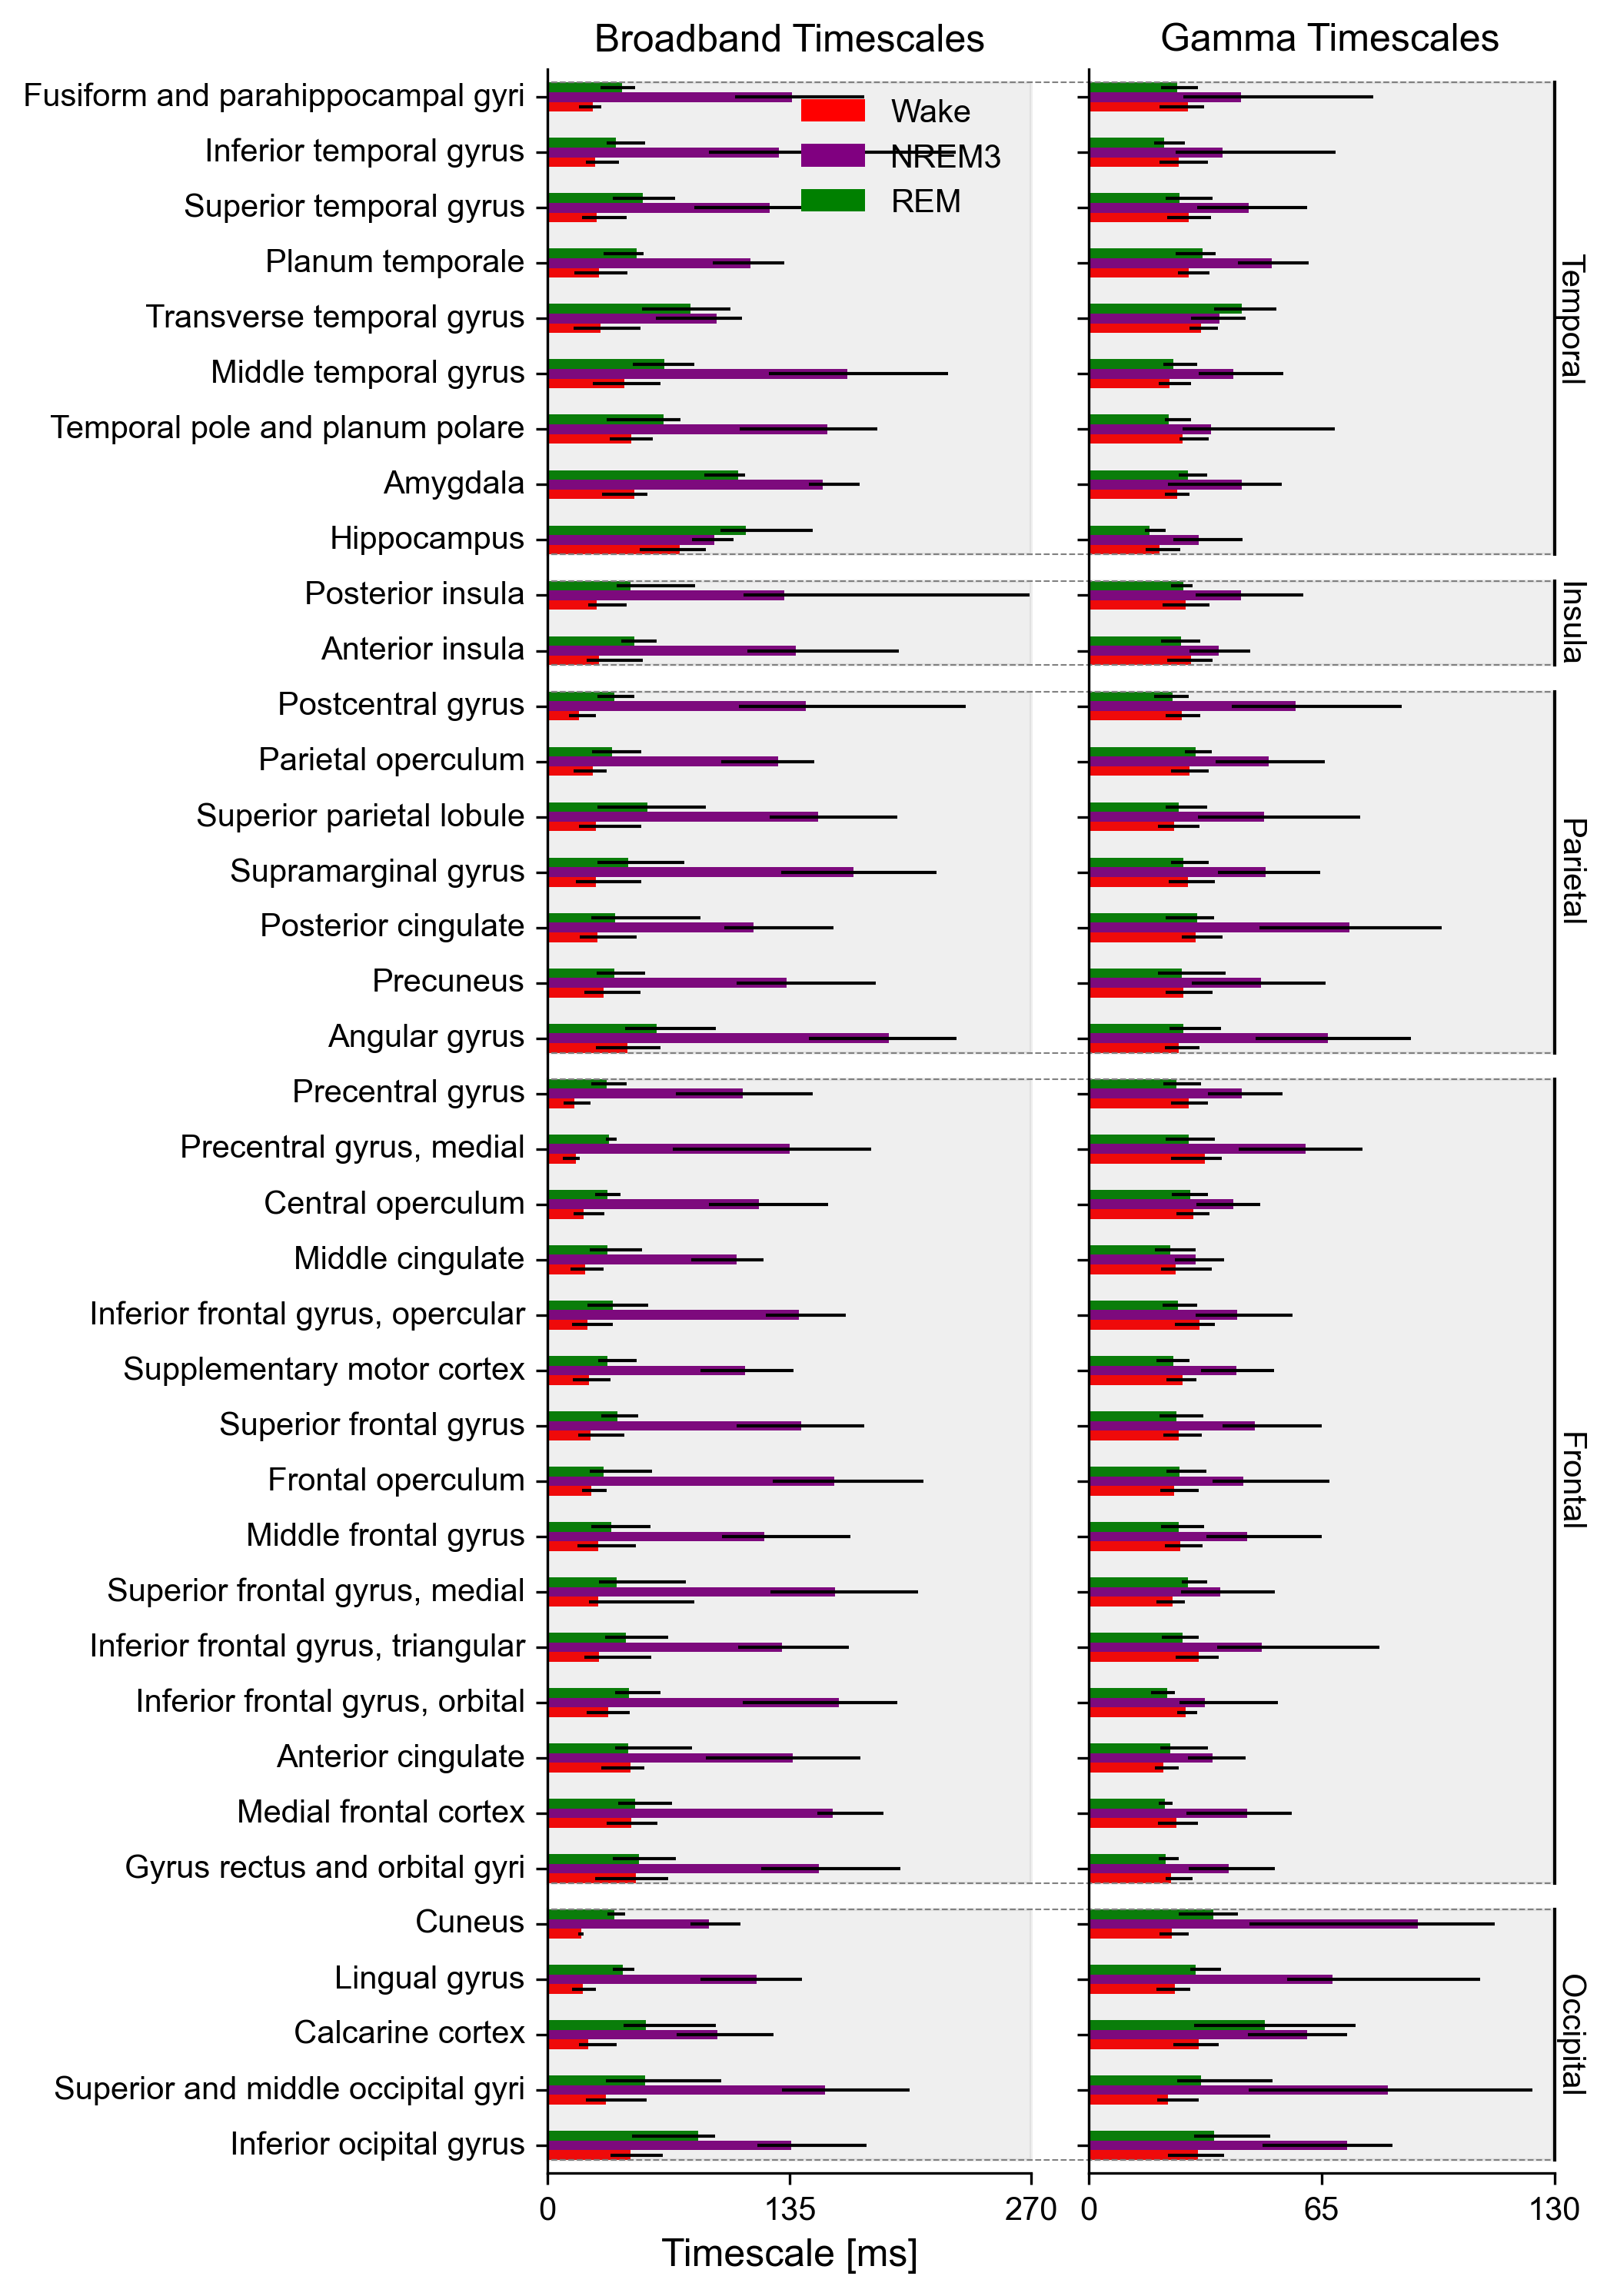

In [29]:
fig, axs = plt.subplots(
    1, 2, figsize=plots._get_figsize_inches((17.4, 25)), dpi=300, layout="constrained"
)
dodge = 0.35

# Axis broadband
plots.plot_conds_regs(
    axs[0],
    df_plot_bb,
    sep=dodge,
    colors_cond={"Wake": "r", "NREM3": "purple", "REM": "g"},
    reg_order=reg_order,
    cond_order=["Wake", "NREM3", "REM"],
    markersize=6,
    plot_type="bar",
)
axs[0].set_xlim(0, 270)
plots._format_spines(axs[0], s_bounds={"bottom": (0, 270)})
axs[0].set_xticks(
    [0, 135, 270],
    labels=[0, 135, 270],
    fontsize=plots.fsize.TICK_SIZE,
)
axs[0].set_xlabel("Timescale [ms]", fontsize=plots.fsize.LABEL_SIZE)
# axs[0].tick_params(axis="y", which="both", labelsize=8)
axs[0].set_ylim(-1, 75)
axs[0].set_title("Broadband Timescales", fontsize=plots.fsize.LABEL_SIZE)

# Axis gamma
plots.plot_conds_regs(
    axs[1],
    df_plot_gamma,
    sep=dodge,
    colors_cond={"Wake": "r", "NREM3": "purple", "REM": "g"},
    reg_order=reg_order,
    cond_order=["Wake", "NREM3", "REM"],
    markersize=6,
    plot_type="bar",
)
axs[1].set_xlim(0, 135)
plots._format_spines(axs[1], s_bounds={"bottom": (0, 130)})
axs[1].set_xticks(
    np.arange(0, 131, 65), labels=[0, 65, 130], fontsize=plots.fsize.TICK_SIZE
)
axs[1].set_xlabel("", fontsize=0)
axs[1].set_yticks(axs[1].get_yticks(), labels=[""] * len(axs[1].get_yticks()), fontsize=0)
axs[1].set_ylim(-1, 75)
axs[1].get_legend().remove()
axs[1].set_title("Gamma Timescales", fontsize=plots.fsize.LABEL_SIZE)


# Lobe separation
idx_plot = 37
max_plot = 130
palette = sns.color_palette("pastel", n_colors=len(df_regions_len))
for i, lobe in enumerate(df_regions_len.index):
    y1 = (idx_plot - df_regions_len[lobe]) * 2 - 1.5 * dodge
    y2 = idx_plot * 2 + 1.5 * dodge

    axs[1].plot(
        [max_plot, max_plot],
        [y1, y2],
        lw=1,
        c="k",
    )
    axs[1].axhline(
        y = y1,
        xmin=-1.11,
        xmax=0.96,
        lw=0.5,
        ls="--",
        c="grey",
        clip_on=False
    )
    axs[1].axhline(
        y = y2,
        xmin=-1.11,
        xmax=0.96,
        lw=0.5,
        ls="--",
        c="grey",
        clip_on=False
    )
    axs[0].axhspan(
        y1, y2,
        color="dimgrey", #palette[i],
        alpha=0.1,
        clip_on=False
    )
    axs[1].axhspan(
        y1, y2,
        xmax=0.96,
        color="dimgrey", #palette[i],
        alpha=0.1,
        clip_on=False
    )

    axs[1].annotate(
        lobe,
        (max_plot, (y1 + y2) / 2),
        va="center",
        rotation=-90,
        fontsize=plots.fsize.TEXT_SIZE,
    )
    idx_plot -= df_regions_len[lobe] + 1

# Save figure
plots.save_figure(fig, fig_path.joinpath(f"mni_order_bars.svg"))

plt.show()

Point plot:

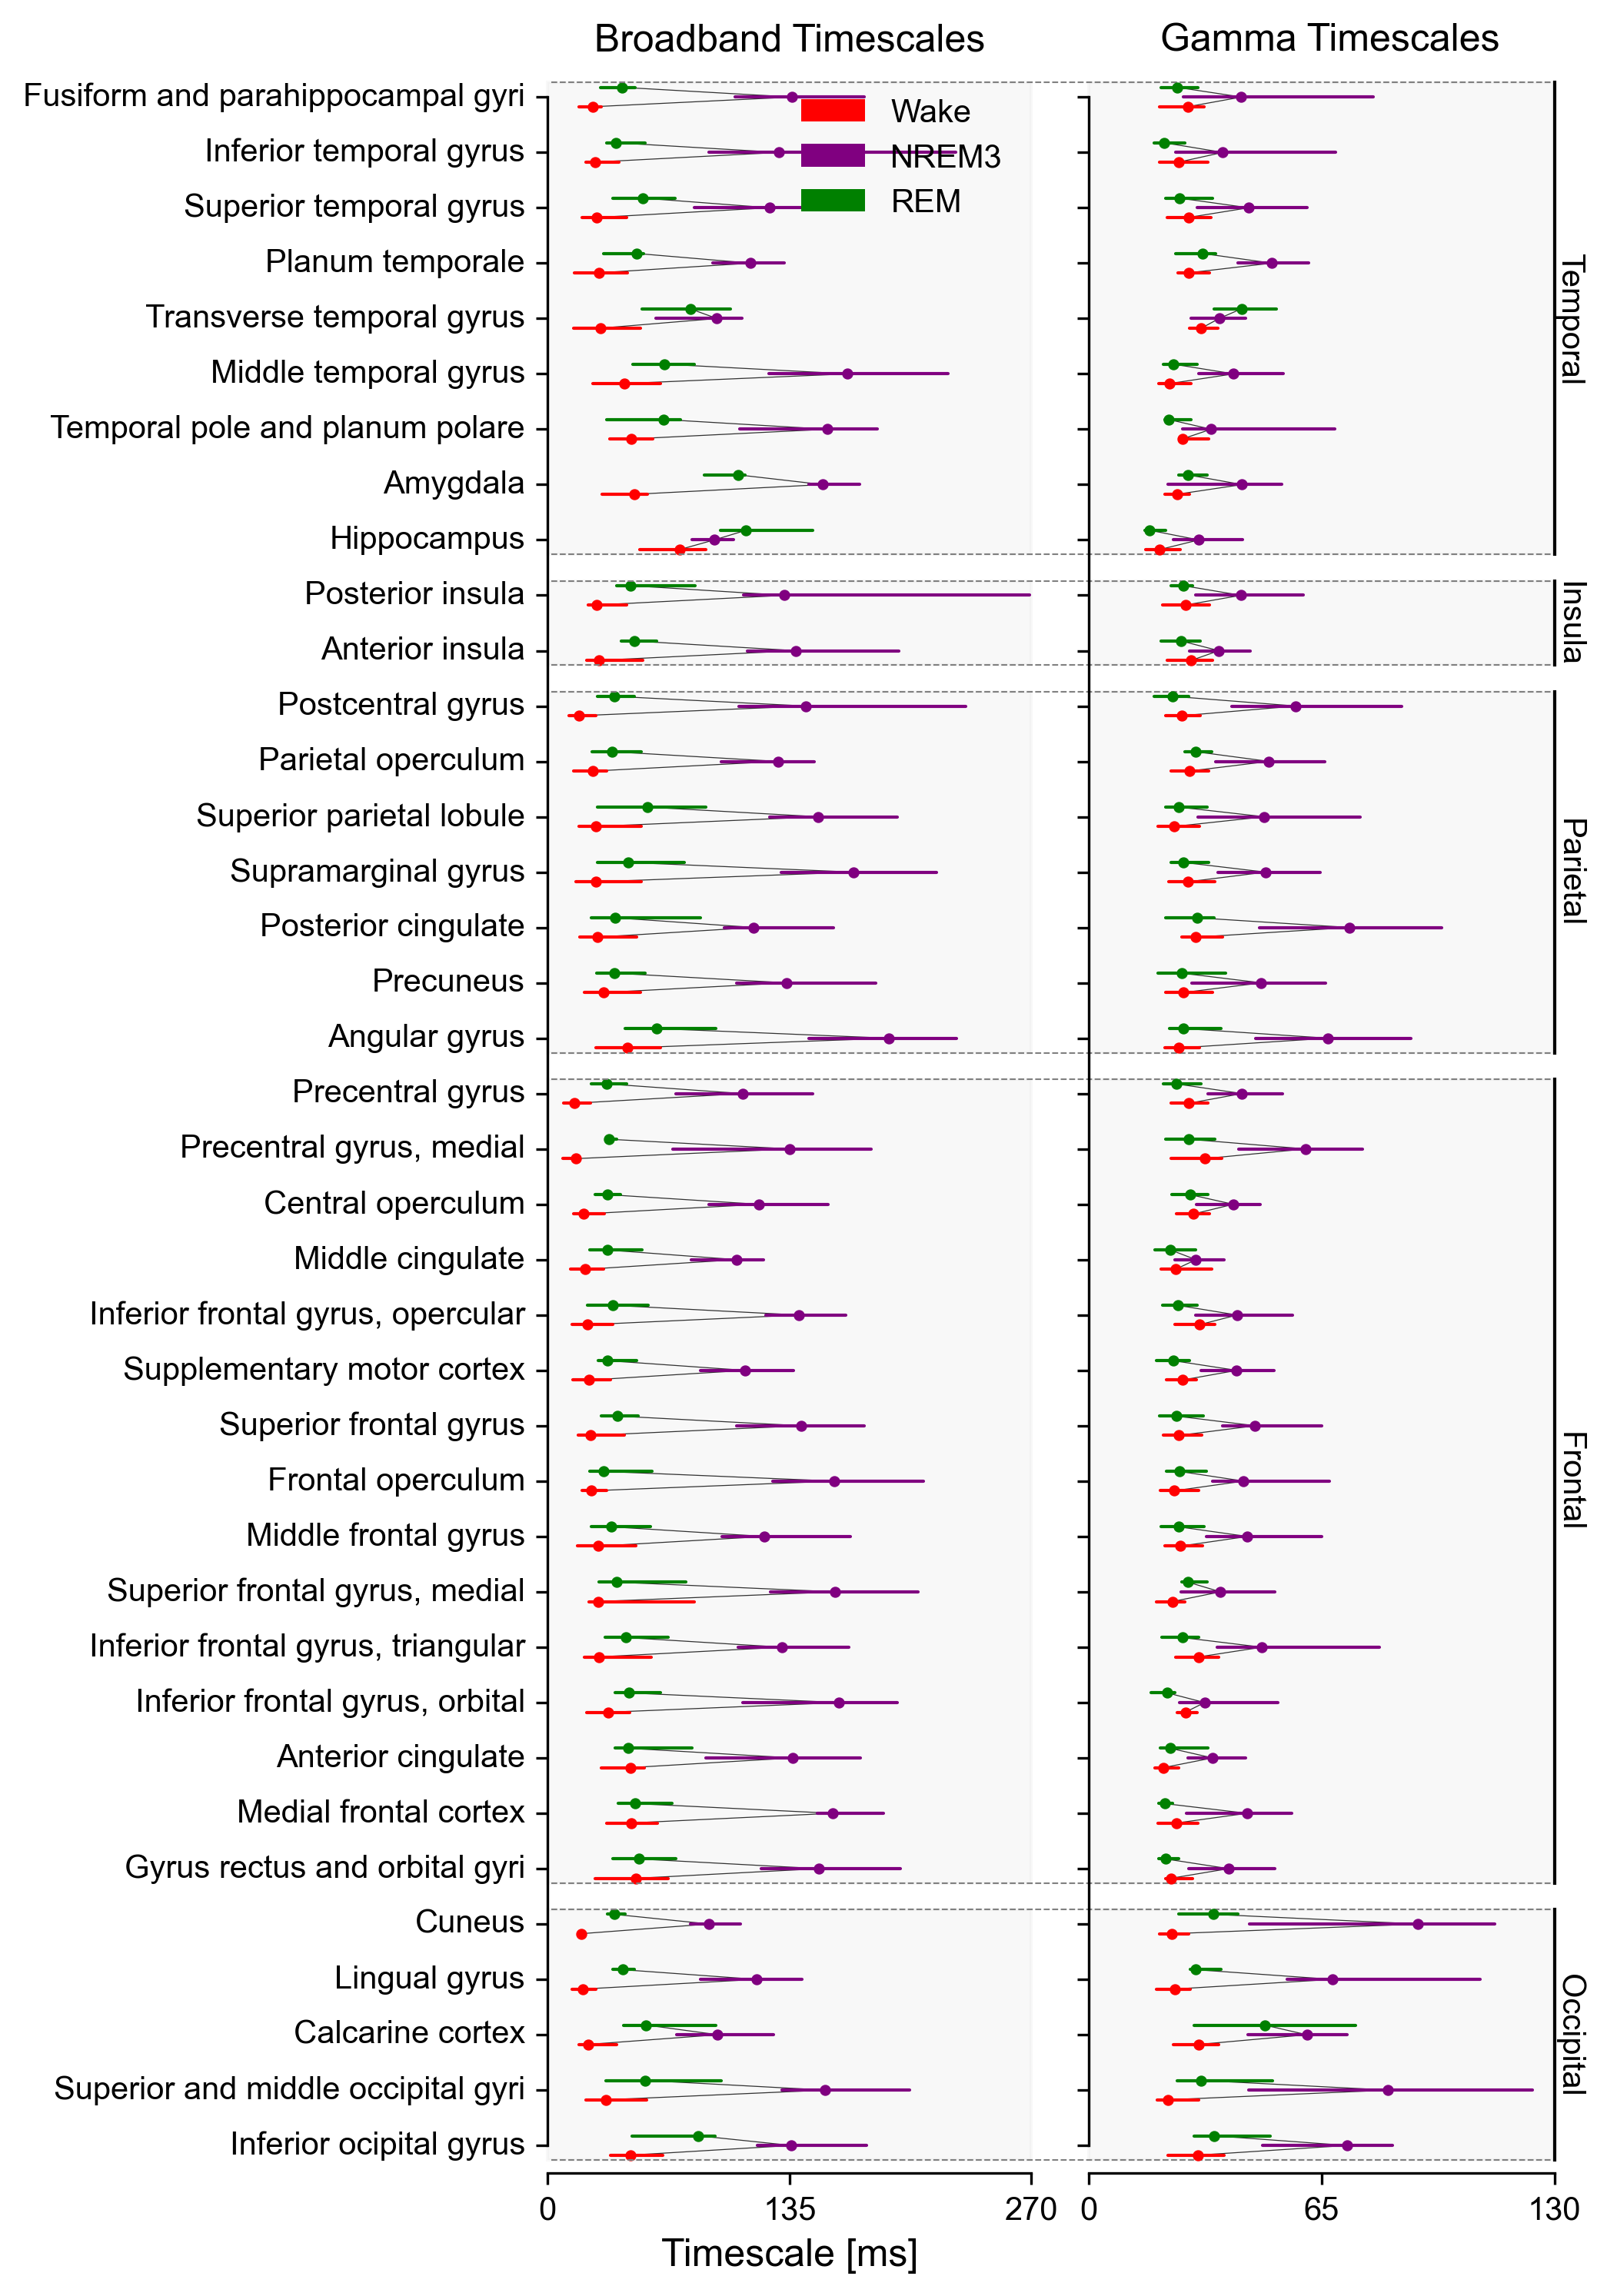

In [35]:
fig, axs = plt.subplots(
    1, 2, figsize=plots._get_figsize_inches((17.4, 25)), dpi=300, layout="constrained"
)
dodge = 0.35

# Axis broadband
plots.plot_conds_regs(
    axs[0],
    df_plot_bb,
    sep=dodge,
    colors_cond={"Wake": "r", "NREM3": "purple", "REM": "g"},
    reg_order=reg_order,
    cond_order=["Wake", "NREM3", "REM"],
    markersize=6,
    plot_type="point",
)
axs[0].set_xlim(0, 270)
plots._format_spines(axs[0], s_bounds={"bottom": (0, 270), "left": (0, 74)})
axs[0].set_xticks(
    [0, 135, 270],
    labels=[0, 135, 270],
    fontsize=plots.fsize.TICK_SIZE,
)
axs[0].set_xlabel("Timescale [ms]", fontsize=plots.fsize.LABEL_SIZE)
# axs[0].tick_params(axis="y", which="both", labelsize=8)
axs[0].set_ylim(-1, 75)
axs[0].set_title("Broadband Timescales", fontsize=plots.fsize.LABEL_SIZE)

# Axis gamma
plots.plot_conds_regs(
    axs[1],
    df_plot_gamma,
    sep=dodge,
    colors_cond={"Wake": "r", "NREM3": "purple", "REM": "g"},
    reg_order=reg_order,
    cond_order=["Wake", "NREM3", "REM"],
    markersize=6,
    plot_type="point",
)
axs[1].set_xlim(0, 135)
plots._format_spines(axs[1], s_bounds={"bottom": (0, 130), "left": (0, 74)})
axs[1].set_xticks(
    np.arange(0, 131, 65), labels=[0, 65, 130], fontsize=plots.fsize.TICK_SIZE
)
axs[1].set_xlabel("", fontsize=0)
axs[1].set_yticks(axs[1].get_yticks(), labels=[""] * len(axs[1].get_yticks()), fontsize=0)
axs[1].set_ylim(-1, 75)
axs[1].get_legend().remove()
axs[1].set_title("Gamma Timescales", fontsize=plots.fsize.LABEL_SIZE)


# Lobe separation
idx_plot = 37
max_plot = 130
palette = sns.color_palette("pastel", n_colors=len(df_regions_len))
for i, lobe in enumerate(df_regions_len.index):
    y1 = (idx_plot - df_regions_len[lobe]) * 2 - 1.5 * dodge
    y2 = idx_plot * 2 + 1.5 * dodge

    axs[1].plot(
        [max_plot, max_plot],
        [y1, y2],
        lw=1,
        c="k",
    )
    axs[1].axhline(
        y = y1,
        xmin=-1.11,
        xmax=0.96,
        lw=0.5,
        ls="--",
        c="grey",
        clip_on=False
    )
    axs[1].axhline(
        y = y2,
        xmin=-1.11,
        xmax=0.96,
        lw=0.5,
        ls="--",
        c="grey",
        clip_on=False
    )
    axs[0].axhspan(
        y1, y2,
        color="gainsboro", # palette[i],
        alpha=0.2,
        clip_on=False
    )
    axs[1].axhspan(
        y1, y2,
        xmax=0.96,
        color="gainsboro", # palette[i],
        alpha=0.2,
        clip_on=False
    )

    axs[1].annotate(
        lobe,
        (max_plot, (y1 + y2) / 2),
        va="center",
        rotation=-90,
        fontsize=plots.fsize.TEXT_SIZE,
    )
    idx_plot -= df_regions_len[lobe] + 1

# Annotate panel
# ax.text(-0.3, 1., "A", transform=ax.transAxes, size=16, weight='bold')

# Save figure
plots.save_figure(fig, fig_path.joinpath(f"mni_order_point.svg"))

plt.show()

Longest timescales:

In [69]:
df_median_bb = df_plot_bb.copy()
df_regions_lobes = pd.Series(dict((v, k) for k, v in df_regions.explode().items()))
df_regions_lobes = df_regions_lobes.reset_index().replace({"index": regions_plot}).set_index("index").squeeze()
df_median_bb["lobe"] = df_regions_lobes.loc[df_median_bb["region"]].values
df_median_bb.iloc[:, 1:].groupby(["lobe", "cond"]).median()
df_median_bb.iloc[:, 1:].groupby(["lobe", "cond"]).median().sort_values(["cond", "Broadband Timescale [ms]"])

,,Broadband Timescale [ms]
lobe,cond,
Occipital,NREM3,118.534472
Frontal,NREM3,129.532413
Temporal,NREM3,133.032946
Insula,NREM3,134.307027
Parietal,NREM3,149.589667
Frontal,REM,37.530070
Parietal,REM,44.562121
Occipital,REM,44.827017
Insula,REM,48.320069


In [67]:
df_median_gamma = df_plot_gamma.copy()
df_regions_lobes = pd.Series(dict((v, k) for k, v in df_regions.explode().items()))
df_regions_lobes = df_regions_lobes.reset_index().replace({"index": regions_plot}).set_index("index").squeeze()
df_median_gamma["lobe"] = df_regions_lobes.loc[df_median_gamma["region"]].values
df_median_gamma.iloc[:, 1:].groupby(["lobe", "cond"]).median().sort_values(["cond", "Gamma Timescale [ms]"])

,,Gamma Timescale [ms]
lobe,cond,
Insula,NREM3,37.340534
Temporal,NREM3,41.591822
Frontal,NREM3,42.583093
Parietal,NREM3,53.999538
Occipital,NREM3,71.509535
Temporal,REM,24.332307
Frontal,REM,24.771961
Insula,REM,25.948840
Parietal,REM,25.993123
